# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Made Vidyatma Adhi Krisna
- Email: krisnahmbtn@gmail.com
- Id Dicoding: adhi_krisna

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1236]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
# 3 models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import joblib



### Menyiapkan data yang akan digunakan

In [1237]:
# Load dataset
df = pd.read_csv('data/data.csv', sep=';')

### 1. Business Understanding

Jaya Jaya Institut mengalami tingkat dropout siswa yang cukup tinggi. Hal ini berdampak pada reputasi dan efektivitas institusi.

### Objective:
Membangun sistem machine learning untuk memprediksi potensi dropout siswa, sehingga pihak sekolah bisa melakukan tindakan preventif dan memberikan bimbingan.

### Goals:
- Memahami karakteristik siswa yang berpotensi dropout
- Membangun model prediktif
- Menyediakan dashboard untuk memonitor performa siswa


## Data Understanding

### 2. Data Understanding

Tahap ini bertujuan untuk memahami struktur dan isi dataset secara keseluruhan. Berikut beberapa langkah awal yang dilakukan:

- Menampilkan **jumlah baris dan kolom** pada dataset menggunakan `df.shape`
- Melihat **5 data teratas** menggunakan `df.head()`
- Menghitung **jumlah nilai kosong (missing values)** pada setiap kolom menggunakan `df.isnull().sum()`
- Menampilkan informasi kolom seperti tipe data dan jumlah non-null menggunakan `df.info()`
- Menampilkan statistik deskriptif dasar dari fitur numerik dengan `df.describe()`
- Memvisualisasikan **distribusi label target** (dalam hal ini kolom `Status`) menggunakan `countplot`

Langkah visualisasi distribusi label (target) sangat penting untuk memahami seberapa seimbang data target yang akan diprediksi. Ketidakseimbangan label dapat berdampak pada performa model dan perlu ditangani dengan teknik seperti oversampling atau undersampling pada tahap modeling.


In [1238]:
# Tampilkan informasi dasar
display(df.shape)
display(df.sample(5))

(4424, 37)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
2647,1,44,1,9003,1,39,130.0,1,38,38,...,0,6,15,2,12.000000,0,16.2,0.3,-0.92,Dropout
571,1,1,1,9147,1,1,130.0,1,38,37,...,0,5,5,1,12.000000,0,7.6,2.6,0.32,Dropout
2188,1,17,1,9254,1,1,140.0,1,3,1,...,0,6,9,3,12.666667,0,9.4,-0.8,-3.12,Graduate
3667,1,42,1,9147,1,1,130.0,1,34,34,...,0,2,2,0,0.000000,0,7.6,2.6,0.32,Dropout
2487,1,18,1,9147,1,1,147.0,1,19,1,...,0,5,0,0,0.000000,0,12.4,0.5,1.79,Dropout


In [1239]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [1240]:
display(df.info())
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

None

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


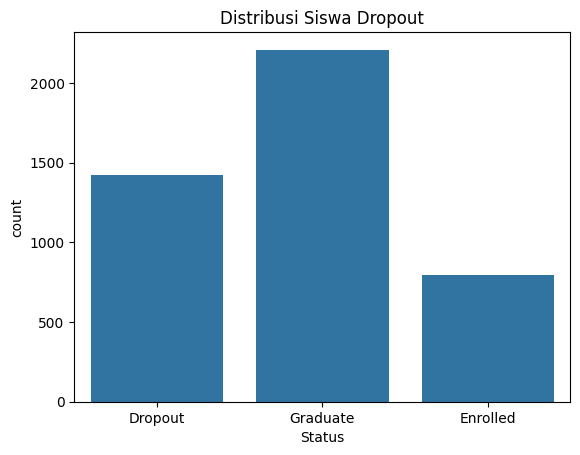

In [1241]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Siswa Dropout')
plt.show()

***Hasil Distribusi Data Target Menunjukkan Central Tendency (Terlalu Banyak Data Graduate Status) dan Terlalu Sedikit Data Enrolled***


### 2.2 Data Understanding – Exploratory Data Analysis (EDA)

Setelah memahami struktur dan metadata dari dataset, tahap selanjutnya adalah eksplorasi data atau *Exploratory Data Analysis (EDA)* untuk menggali pola awal, deteksi outlier, distribusi nilai, serta keterkaitan antar fitur dengan label target (`Status`).

#### 📌 Tujuan EDA:
- Memahami karakteristik fitur numerik terhadap target
- Menganalisis hubungan fitur ordinal & nominal dengan status siswa
- Mengidentifikasi potensi outlier atau skewed data

---


***Pisahkan Kategori Fitur Menjadi Numeric, Ordinal (Categorical), dan Nominal (Categorical)***

In [1242]:
# Fitur numerik (data diskrit/kontinu, cocok untuk scaling)
numeric_features = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

# Fitur ordinal (ada urutan jelas, biasanya berupa level pendidikan/posisi)
ordinal_features = [
    'Marital_status', 'Mothers_qualification', 'Fathers_qualification'
]

nominal_features = [
    'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality',
    'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender',
    'Scholarship_holder', 'International'
]


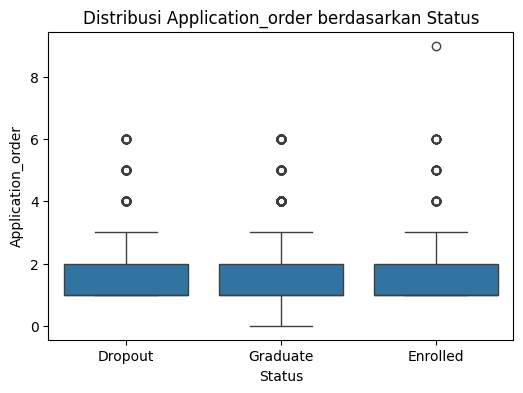

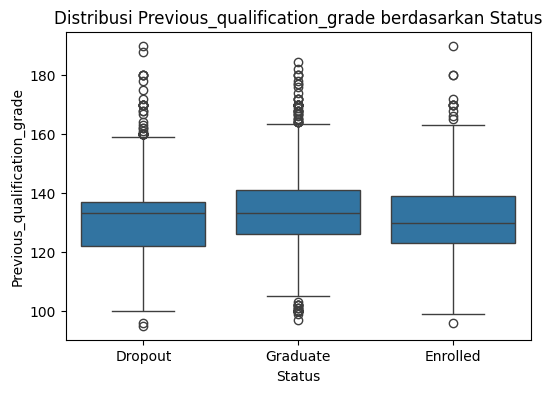

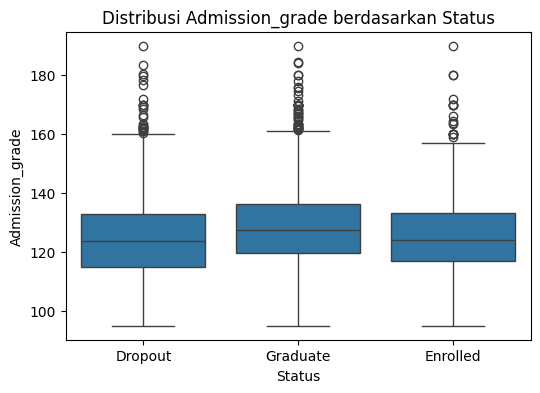

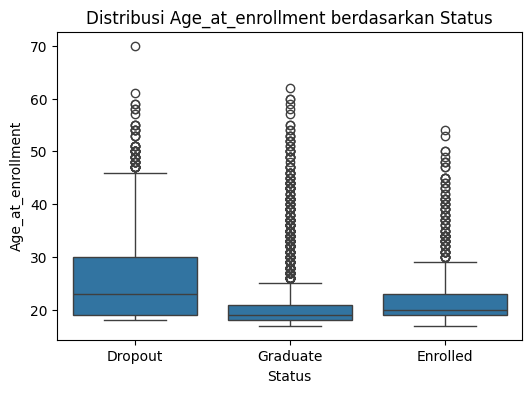

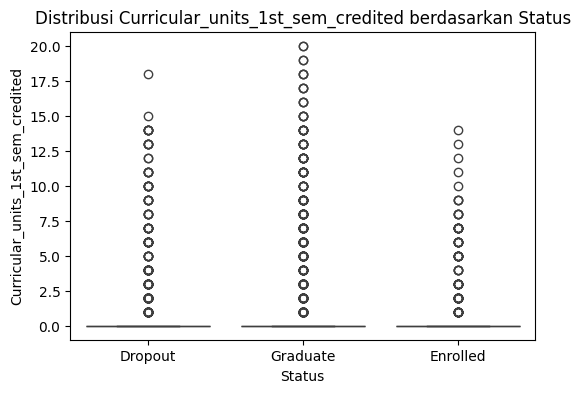

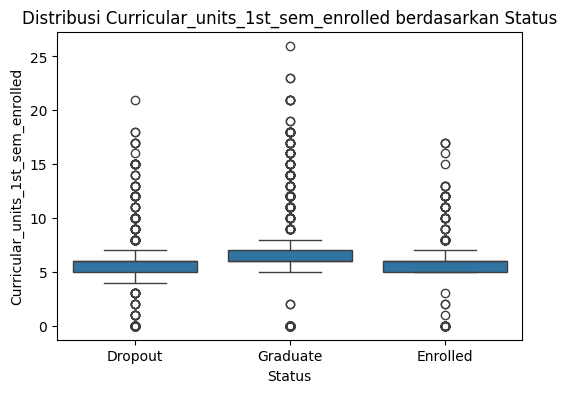

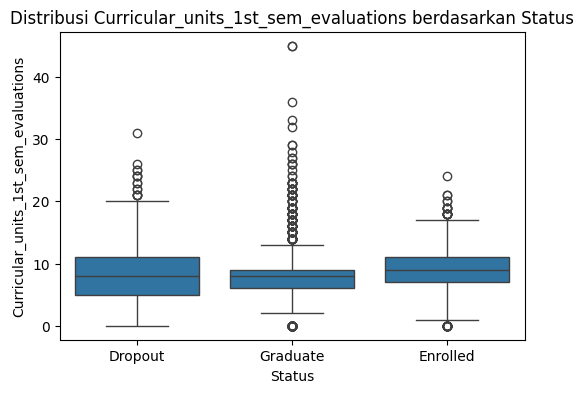

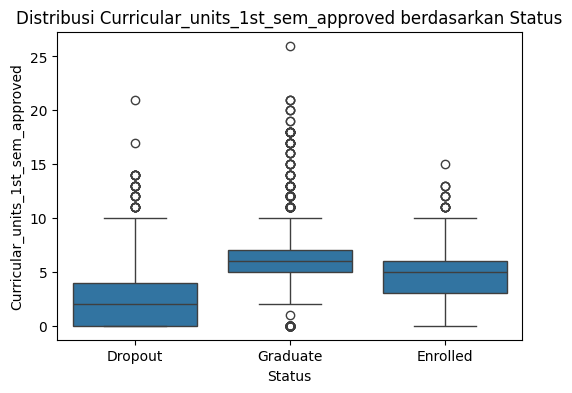

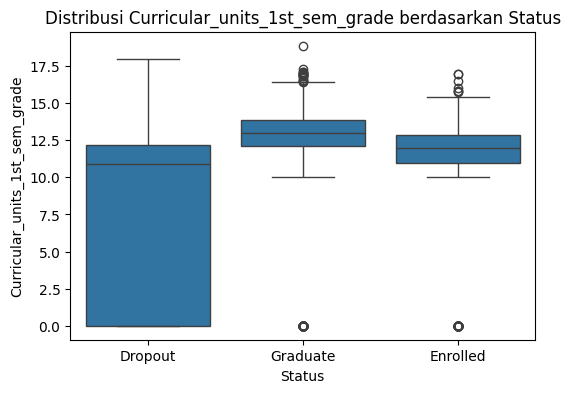

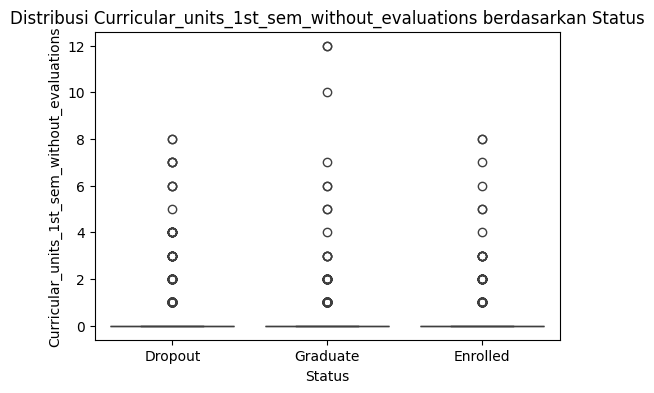

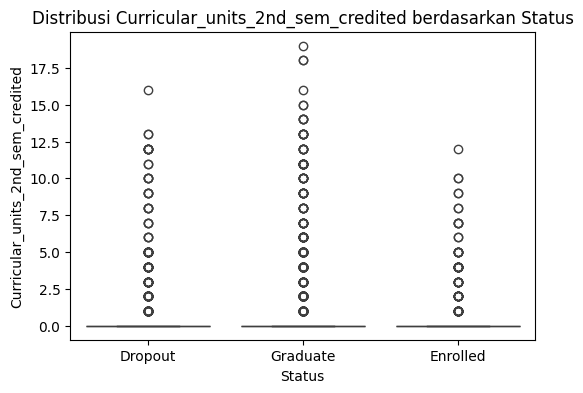

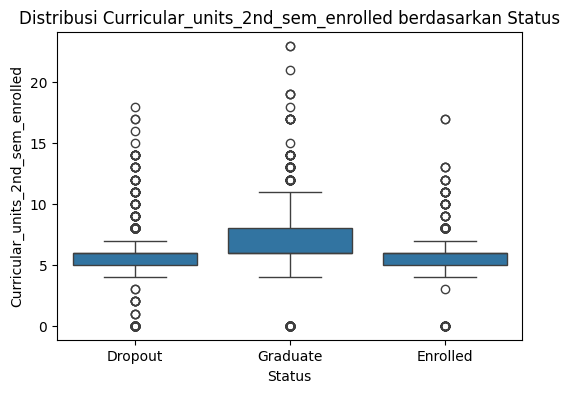

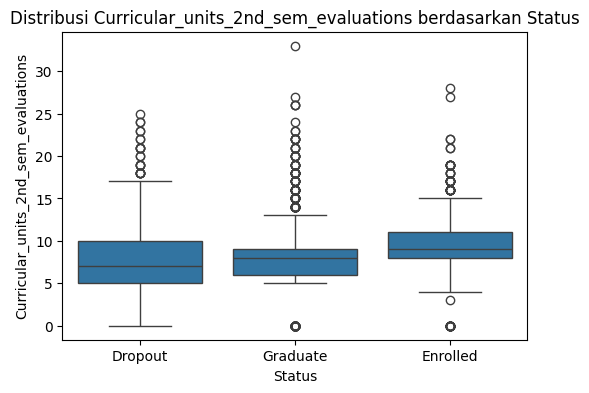

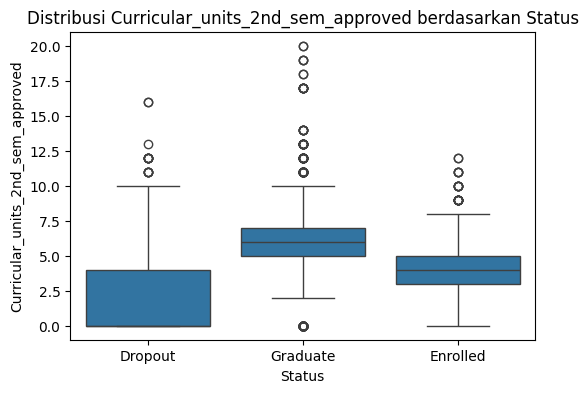

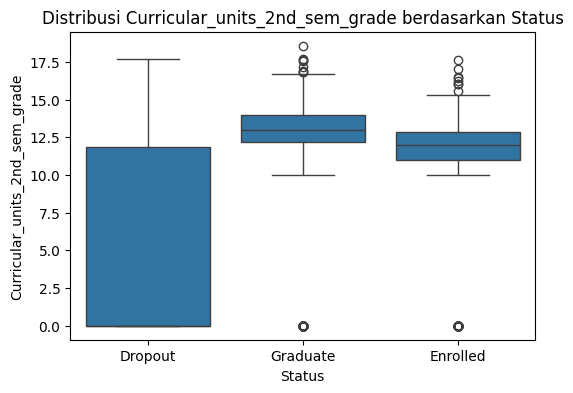

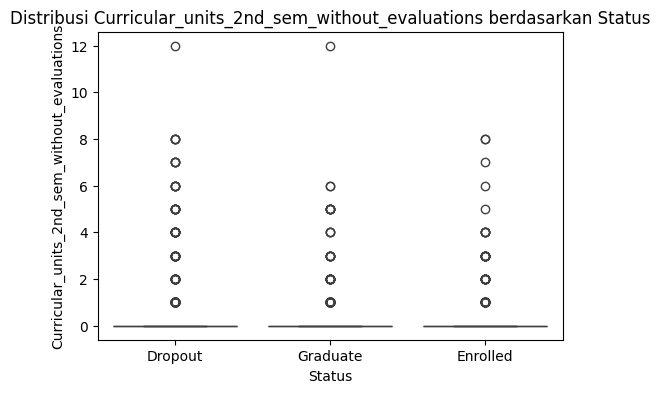

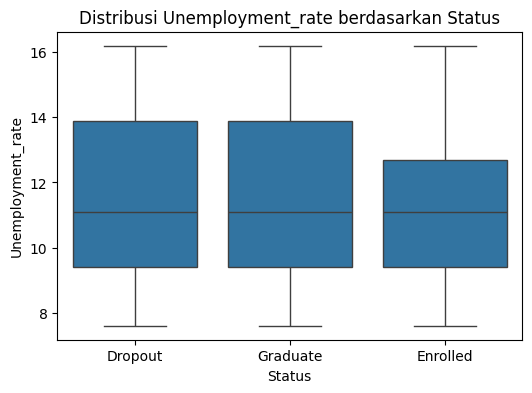

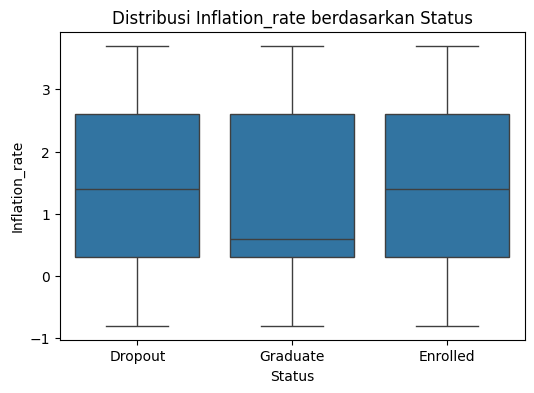

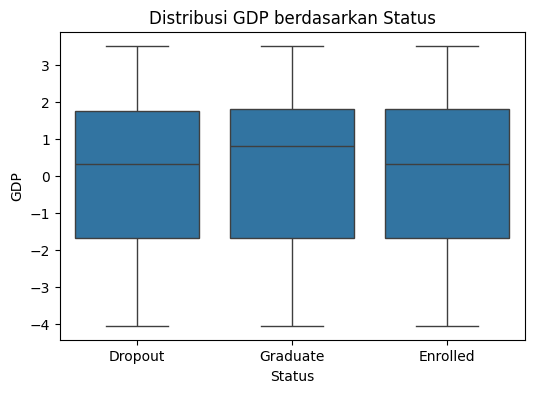

In [1243]:
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Status', y=col, data=df)
    plt.title(f'Distribusi {col} berdasarkan Status')
    plt.show()

***Function untuk Visualisasi Value dari Data Categorical Terhadap Target***

In [1244]:
def plot_categorical_feature(df, col):
    # Jika jumlah category lebih dari 10, gunakan ukuran gambar yang lebih besar
    if len(df[col].unique()) > 10:
        plt.figure(figsize=(12, 6))
        plt.xticks(rotation=45, ha='right')
        print(f"Plotting {col} with length > 10")
    else:
        plt.figure(figsize=(8, 4))
        plt.xticks(rotation=45)
    
    
    sns.countplot(x=col, hue='Status', data=df)
    plt.title(f'Sebaran Status Berdasarkan {col} (Ordinal)')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

***Mapping dan Visualisasi Value dari Data Ordinal Terhadap Target***

In [1245]:
marital_status_map = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Facto Union",
    6: "Legally Separated"
}


mothers_qualification_map = {
    1: "12th Year of Schooling",
    2: "Bachelor's Degree",
    3: "Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year - Not Completed",
    10: "11th Year - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year",
    14: "10th Year",
    18: "General Commerce Course",
    19: "Basic Ed. 3rd Cycle",
    22: "Technical-Professional Course",
    26: "7th Year of Schooling",
    27: "2nd Cycle of High School",
    29: "9th Year - Not Completed",
    30: "8th Year",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read (No 4th Year)",
    37: "Basic Ed. 1st Cycle",
    38: "Basic Ed. 2nd Cycle",
    39: "Technological Specialization",
    40: "Degree (1st Cycle)",
    41: "Specialized Higher Studies",
    42: "Professional Higher Technical",
    43: "Master (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

fathers_qualification_map = {
    1: "12th Year of Schooling",
    2: "Bachelor's Degree",
    3: "Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year - Not Completed",
    10: "11th Year - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year",
    13: "2nd Year Complementary HS",
    14: "10th Year",
    18: "General Commerce Course",
    19: "Basic Ed. 3rd Cycle",
    20: "Complementary HS Course",
    22: "Technical-Professional Course",
    25: "Complementary HS - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle of High School",
    29: "9th Year - Not Completed",
    30: "8th Year",
    31: "General Course Admin/Commerce",
    33: "Supplementary Accounting/Admin",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read (No 4th Year)",
    37: "Basic Ed. 1st Cycle",
    38: "Basic Ed. 2nd Cycle",
    39: "Technological Specialization",
    40: "Degree (1st Cycle)",
    41: "Specialized Higher Studies",
    42: "Professional Higher Technical",
    43: "Master (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

# Map the ordinal features
df['Marital_status'] = df['Marital_status'].map(marital_status_map)
df['Mothers_qualification'] = df['Mothers_qualification'].map(mothers_qualification_map)
df['Fathers_qualification'] = df['Fathers_qualification'].map(fathers_qualification_map)

***Menampilkan Jumlah Kategori Per Fitur (Ordinal)***

In [1246]:
# Tampilkan jumlah map/kategori unik dari masing-masing kolom ordinal
for col in ordinal_features:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} kategori")

Marital_status: 6 kategori
Mothers_qualification: 29 kategori
Fathers_qualification: 34 kategori


***Visualisasi Data Ordinal Terhadap Target***

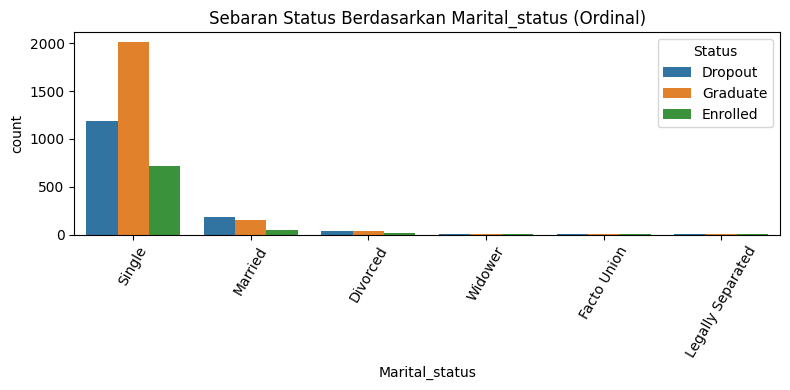

Plotting Mothers_qualification with length > 10


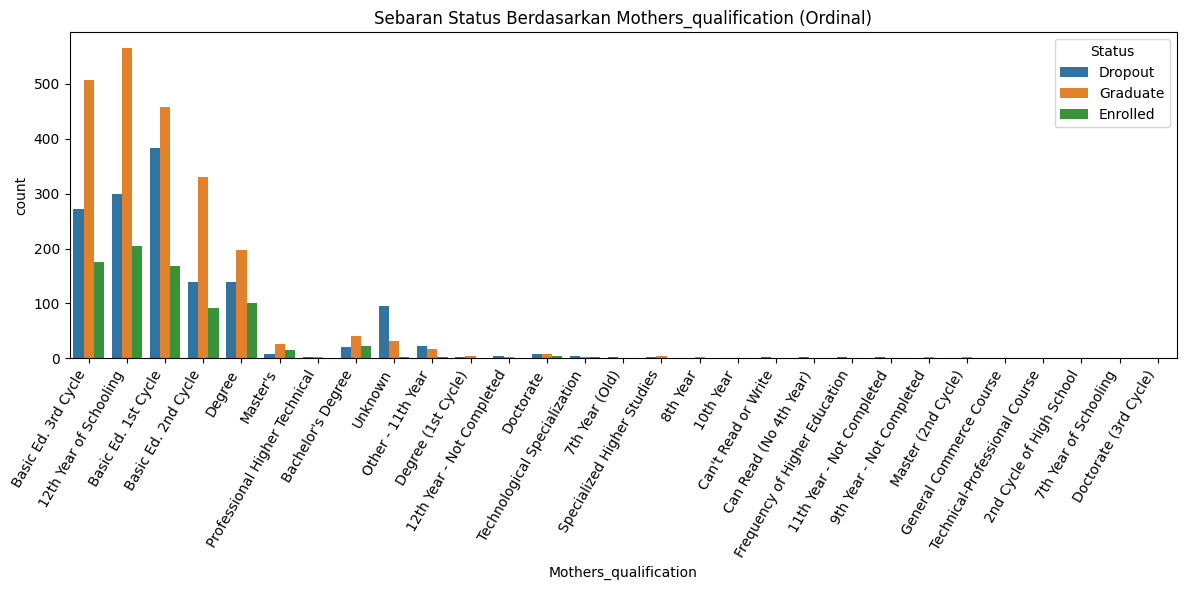

Plotting Fathers_qualification with length > 10


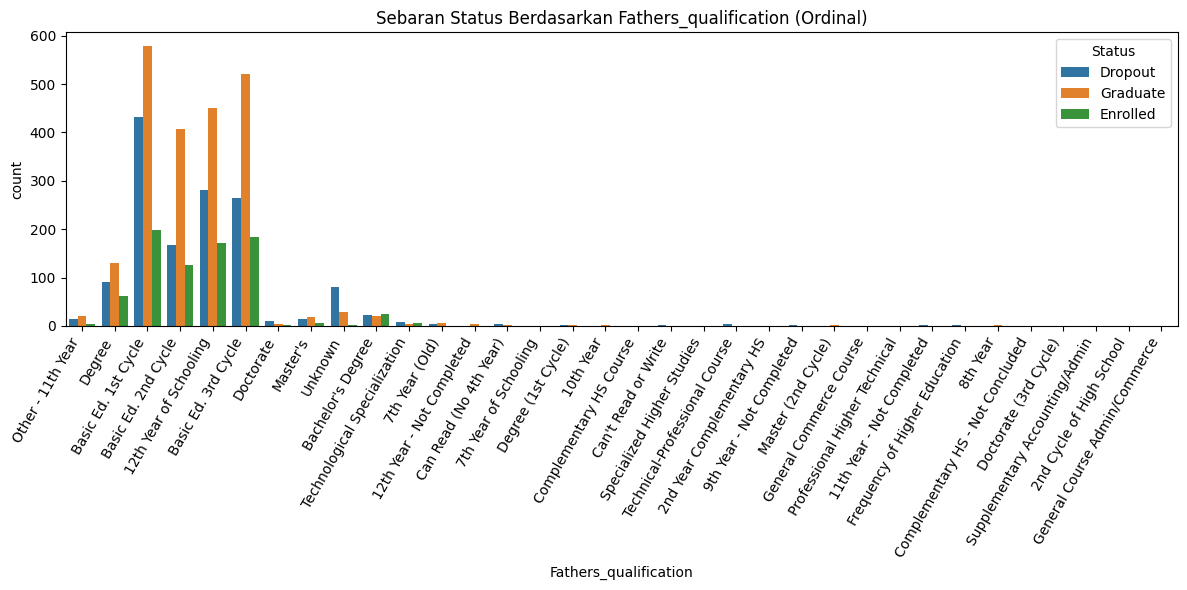

In [1247]:
plot_categorical_feature(df, 'Marital_status')
plot_categorical_feature(df, 'Mothers_qualification')
plot_categorical_feature(df, 'Fathers_qualification')

***Mapping dan Visualisasi Value dari Data Nominal Terhadap Target***

In [1248]:
prev_qualification_map = {
    1: 'Secondary Edu',
    2: "Bachelor's",
    3: "Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Freq Higher Edu",
    9: "12th School not completed",
    10: "11th School not completed",
    12: "Other - 11th School",
    14: "10th",
    15: "10th School not completed",
    19: "Basic Edu 3rd",
    38: "Basic Edu 2nd",
    39: "Tech Specialization Course",
    40: "Degree (1st cycle)",
    42: "Prof. Higher Course",
    43: "Master (2nd cycle)"
}

application_mode_map = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}

course_map = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

daytime_evening_attendance_map = {
    1: "Daytime",
    0: "Evening"
}

nacionality_map = {
    1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch",
    14: "English", 17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean",
    24: "Guinean", 25: "Mozambican", 26: "Santomean", 32: "Turkish",
    41: "Brazilian", 62: "Romanian", 100: "Moldova (Republic of)",
    101: "Mexican", 103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"
}

# mothers_occupation_map = {
#     1: "Secondary Edu - 12th", 2: "Bachelor's", 3: "Degree", 4: "Master's", 5: "Doctorate",
#     6: "Freq Higher Edu", 9: "12th not completed", 10: "11th not completed",
#     11: "7th Year (Old)", 12: "Other - 11th", 14: "10th", 18: "General commerce course",
#     19: "Basic Edu 3rd", 22: "Technical-professional course", 26: "7th schooling",
#     27: "2nd cycle high school", 29: "9th not completed", 30: "8th schooling",
#     34: "Unknown", 35: "Can't read/write", 36: "Literate no 4th grade",
#     37: "Basic Edu 1st cycle", 38: "Basic Edu 2nd cycle", 39: "Tech specialization",
#     40: "Higher Edu - degree (1st cycle)", 41: "Specialized studies",
#     42: "Prof. tech course", 43: "Master (2nd cycle)", 44: "Doctorate (3rd cycle)"
# }

# fathers_occupation_map = {
#     1: "Secondary Edu - 12th", 2: "Bachelor's", 3: "Degree", 4: "Master's", 5: "Doctorate",
#     6: "Freq Higher Edu", 9: "12th not completed", 10: "11th not completed",
#     11: "7th Year (Old)", 12: "Other - 11th", 13: "2nd year comp. high school",
#     14: "10th", 18: "General commerce course", 19: "Basic Edu 3rd",
#     20: "Comp. High School Course", 22: "Technical-professional course",
#     25: "Comp. High School not concluded", 26: "7th schooling",
#     27: "2nd cycle high school", 29: "9th not completed", 30: "8th schooling",
#     31: "Admin and Commerce", 33: "Supp. Accounting/Admin", 34: "Unknown",
#     35: "Can't read/write", 36: "Literate no 4th grade", 37: "Basic Edu 1st cycle",
#     38: "Basic Edu 2nd cycle", 39: "Tech specialization",
#     40: "Higher Edu - degree (1st cycle)", 41: "Specialized studies",
#     42: "Prof. tech course", 43: "Master (2nd cycle)", 44: "Doctorate (3rd cycle)"
# }

displaced_map = {
    1: "Yes",
    0: "No"
}

educational_special_needs_map = {
    1: "Yes",
    0: "No"
}

debtor_map = {
    1: "Yes",
    0: "No"
}

tuition_fees_up_to_date_map = {
    1: "Yes",
    0: "No"
}

gender_map = {
    1: "Male",
    0: "Female"
}

scholarship_holder_map = {
    1: "Yes",
    0: "No"
}

international_map = {
    1: "Yes",
    0: "No"
}


df['Previous_qualification'] = df['Previous_qualification'].map(prev_qualification_map)
df['Application_mode'] = df['Application_mode'].map(application_mode_map)
df['Course'] = df['Course'].map(course_map)
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(daytime_evening_attendance_map)
df['Nacionality'] = df['Nacionality'].map(nacionality_map)
# df['Mothers_occupation'] = df['Mothers_occupation'].map(mothers_occupation_map)
# df['Fathers_occupation'] = df['Fathers_occupation'].map(fathers_occupation_map)
df['Displaced'] = df['Displaced'].map(displaced_map)
df['Educational_special_needs'] = df['Educational_special_needs'].map(educational_special_needs_map)
df['Debtor'] = df['Debtor'].map(debtor_map)
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(tuition_fees_up_to_date_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Scholarship_holder'] = df['Scholarship_holder'].map(scholarship_holder_map)
df['International'] = df['International'].map(international_map)

***Menampilkan Jumlah Kategori Per Fitur (Nominal)***

In [1249]:
# Tampilkan jumlah map/kategori unik dari masing-masing kolom nominal
for col in nominal_features:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} kategori")

Application_mode: 18 kategori
Course: 17 kategori
Daytime_evening_attendance: 2 kategori
Previous_qualification: 17 kategori
Nacionality: 21 kategori
Mothers_occupation: 32 kategori
Fathers_occupation: 46 kategori
Displaced: 2 kategori
Educational_special_needs: 2 kategori
Debtor: 2 kategori
Tuition_fees_up_to_date: 2 kategori
Gender: 2 kategori
Scholarship_holder: 2 kategori
International: 2 kategori


***Visualisasi Data Nominal Terhadap Target***

Plotting Application_mode with length > 10


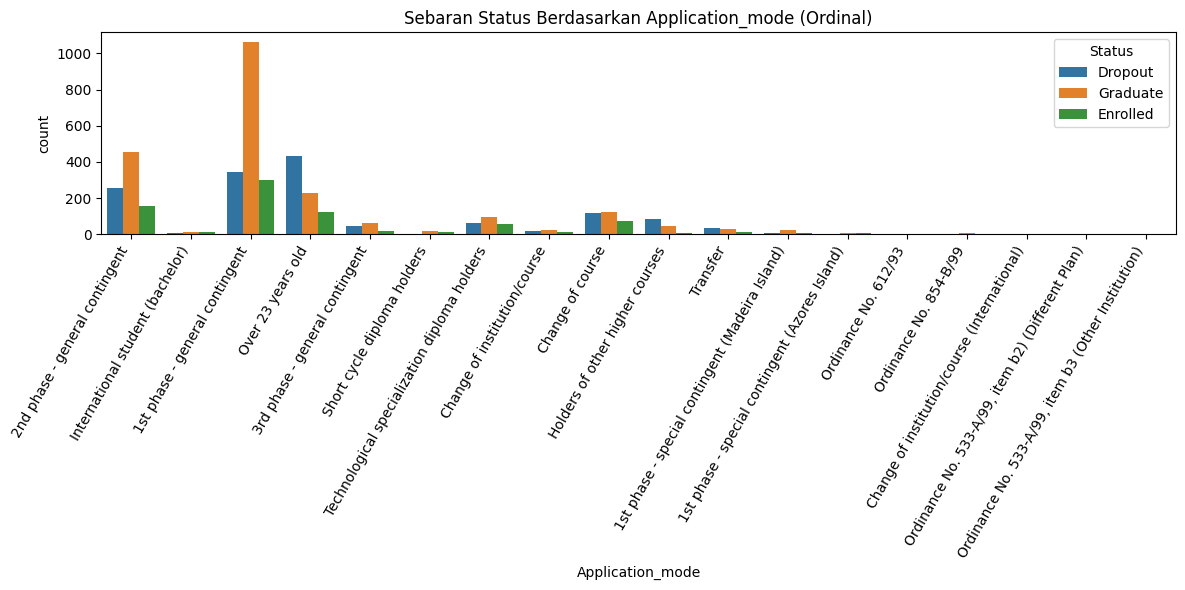

Plotting Course with length > 10


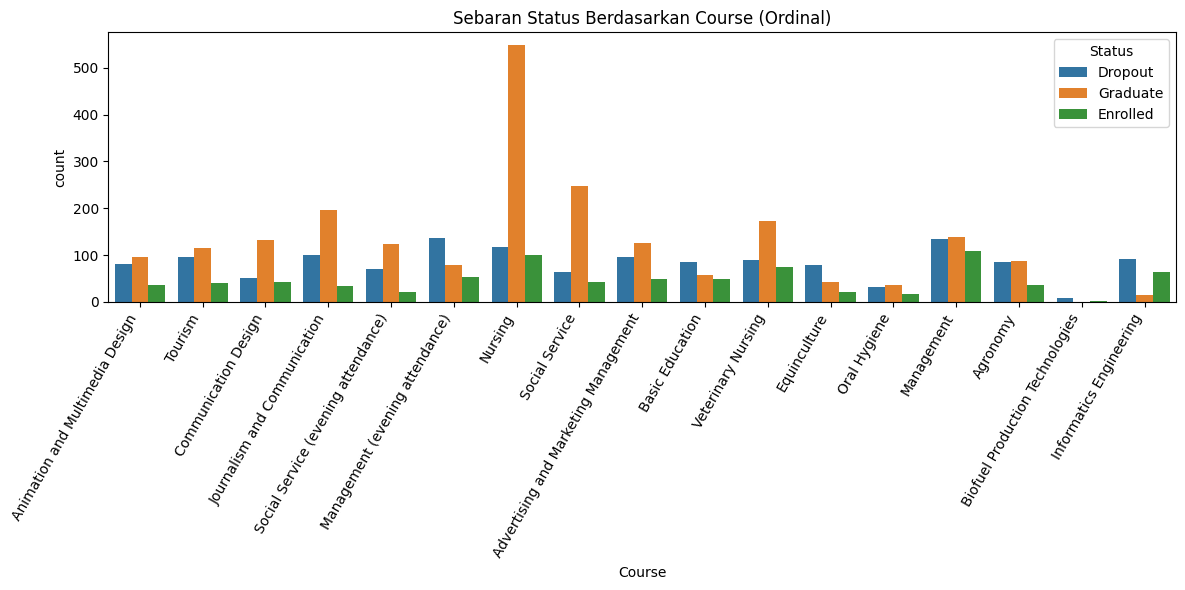

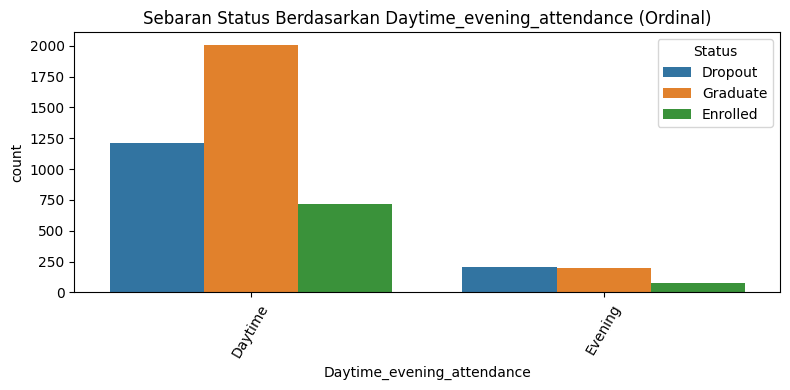

Plotting Previous_qualification with length > 10


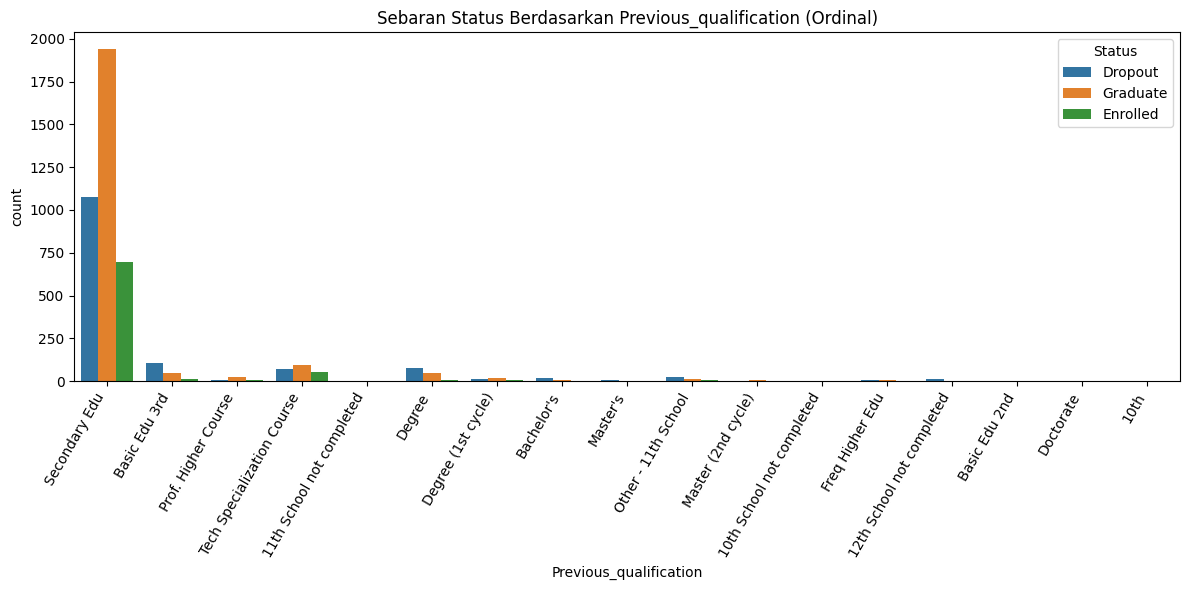

Plotting Nacionality with length > 10


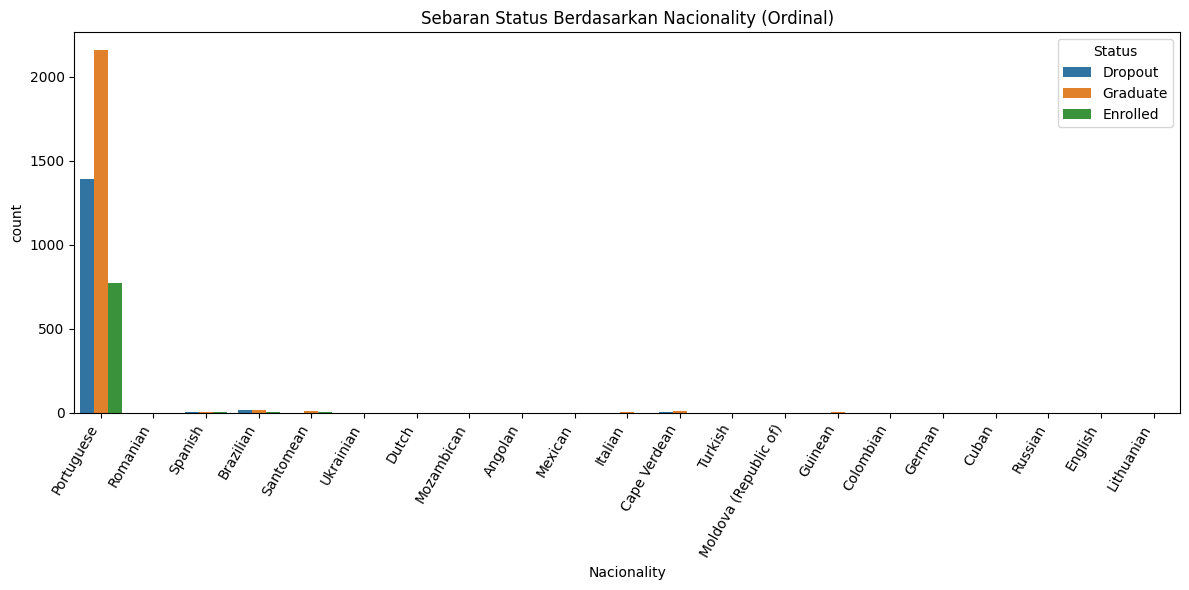

Plotting Mothers_occupation with length > 10


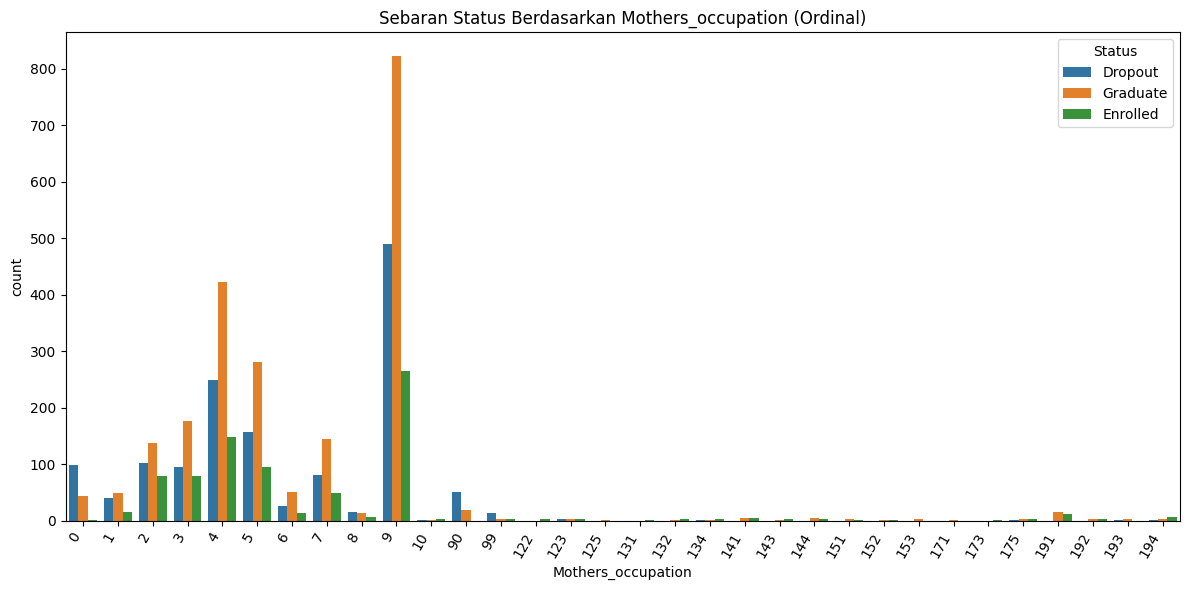

Plotting Fathers_occupation with length > 10


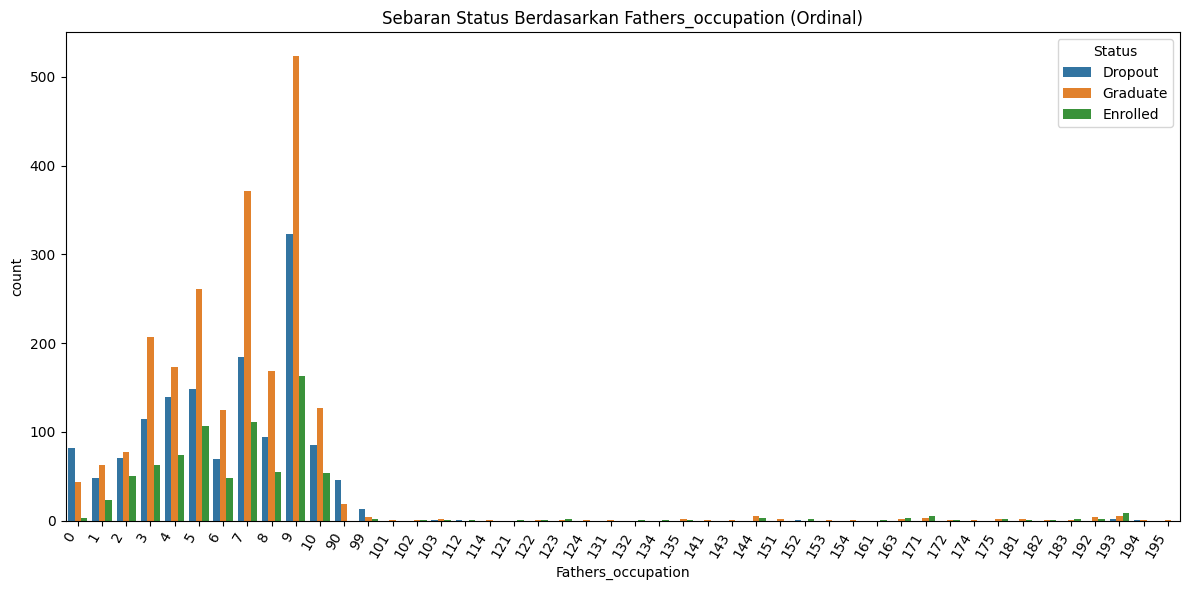

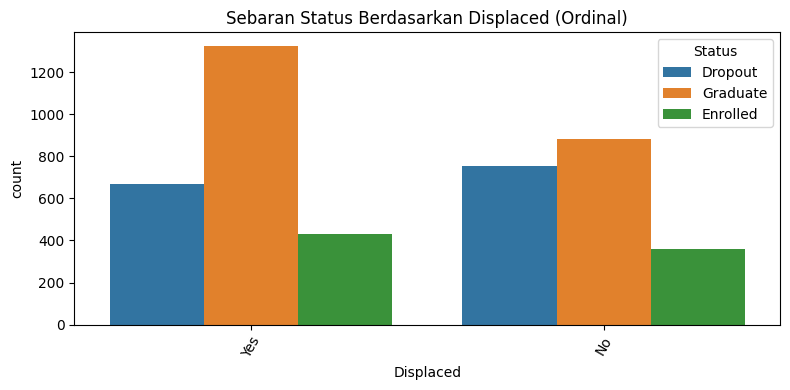

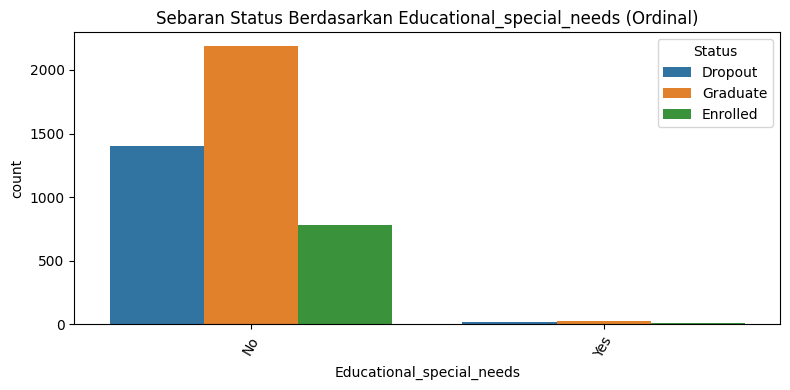

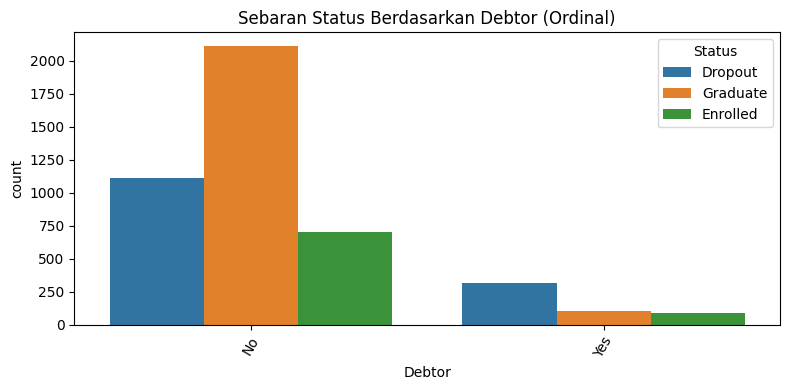

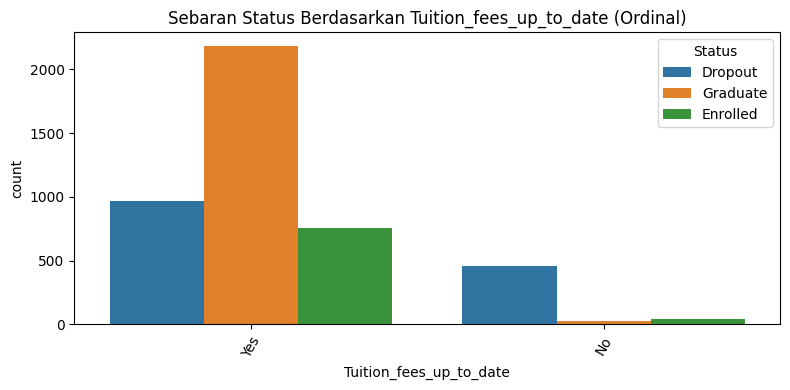

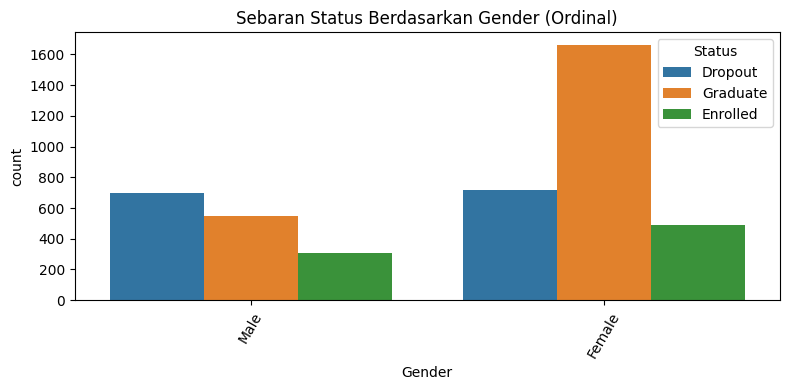

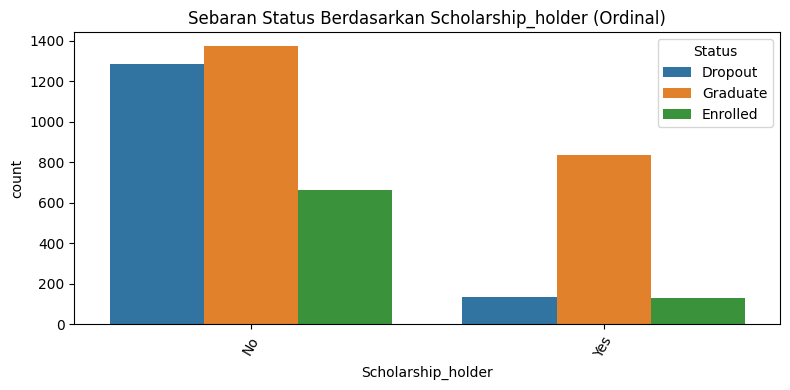

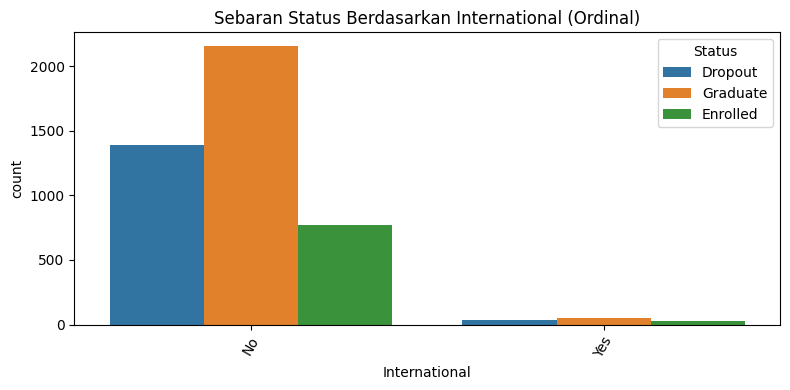

In [1250]:
plot_categorical_feature(df, 'Application_mode')
plot_categorical_feature(df, 'Course')
plot_categorical_feature(df, 'Daytime_evening_attendance')
plot_categorical_feature(df, 'Previous_qualification')
plot_categorical_feature(df, 'Nacionality')
plot_categorical_feature(df, 'Mothers_occupation')
plot_categorical_feature(df, 'Fathers_occupation')
plot_categorical_feature(df, 'Displaced')
plot_categorical_feature(df, 'Educational_special_needs')
plot_categorical_feature(df, 'Debtor')
plot_categorical_feature(df, 'Tuition_fees_up_to_date')
plot_categorical_feature(df, 'Gender'),
plot_categorical_feature(df, 'Scholarship_holder')
plot_categorical_feature(df, 'International')

***Simpan Data yang Sudah di Explore***

In [1251]:
df.to_csv("data/explored_data.csv", index=False)

## Data Preparation / Preprocessing

### 3. Data Preprocessing

Tahapan ini mencakup pembersihan data, penanganan outlier, encoding, dan balancing.

- 🧹 Drop kolom konstan dan tidak informatif.
- 📊 Tangani outlier pada fitur numerik menggunakan imputasi KNN.
- 🧼 Bersihkan data dari baris yang masih mengandung outlier setelah imputasi.
- ⚙️ Terapkan encoding untuk fitur numerik, ordinal, dan nominal menggunakan `ColumnTransformer`.
- 🏷️ Encode label target (`Status`) menggunakan `LabelEncoder`.
- 📤 Lakukan `train-test split` dan resampling menggunakan SMOTE untuk mengatasi ketidakseimbangan kelas.
- 💾 Simpan pipeline `preprocessor.pkl` untuk keperluan deployment.

Distribusi label dicek sebelum dan sesudah balancing untuk memastikan data training cukup representatif untuk semua kelas.


In [1252]:
df = pd.read_csv('data/explored_data.csv', sep=',')

In [1253]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [1254]:
# Cari kolom dengan hanya satu nilai unik
drop_columns = [col for col in df.columns if df[col].nunique() == 1]

drop_columns_manual = ['Inflation_rate', 'GDP', 'Unemployment_rate', 'Mothers_occupation', 'Fathers_occupation', 'Mothers_qualification', 'Fathers_qualification']
drop_columns += drop_columns_manual
print(drop_columns)

# Hapus kolom yang dianggap tidak diperlukan
df.drop(columns=drop_columns, inplace=True)

['Inflation_rate', 'GDP', 'Unemployment_rate', 'Mothers_occupation', 'Fathers_occupation', 'Mothers_qualification', 'Fathers_qualification']


In [1255]:
df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Admission_grade,Displaced,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
2067,Single,2nd phase - general contingent,5,Communication Design,Daytime,Secondary Edu,133.0,Portuguese,132.0,Yes,...,6,13.000000,0,0,6,6,6,12.500000,0,Graduate
2702,Single,2nd phase - general contingent,1,Informatics Engineering,Daytime,Secondary Edu,130.0,Portuguese,119.9,Yes,...,0,0.000000,0,0,5,5,0,0.000000,5,Dropout
77,Single,2nd phase - general contingent,4,Journalism and Communication,Daytime,Secondary Edu,121.0,Portuguese,120.3,Yes,...,6,13.666667,0,0,6,6,6,13.333333,0,Graduate
2016,Single,Over 23 years old,1,Tourism,Daytime,Secondary Edu,160.0,Portuguese,116.3,Yes,...,5,12.600000,0,0,6,7,5,12.200000,0,Graduate
3405,Single,2nd phase - general contingent,2,Animation and Multimedia Design,Daytime,Secondary Edu,146.0,Portuguese,155.1,Yes,...,0,0.000000,0,0,0,0,0,0.000000,0,Graduate


In [1256]:
# menghapus kolom yang tidak diperlukan dari fitur numerik, ordinal, dan nominal
for col in drop_columns:
    if col in numeric_features:
        numeric_features.remove(col)
    elif col in ordinal_features:
        ordinal_features.remove(col)
    elif col in nominal_features:
        nominal_features.remove(col)

In [1257]:
# Replace outliers dengan imputasi KNN
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Tandai outlier dengan np.nan dulu
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan

# Imputasi dengan KNN
df[numeric_features] = imputer.fit_transform(df[numeric_features])



In [1258]:
df_clean = df.copy()

for col in numeric_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only data within IQR range
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Jumlah data yang dihapus dari data yang masih outliers: {df.shape[0] - df_clean.shape[0]} baris.")
print(f"Jumlah data setelah membersihkan outliers: {df_clean.shape[0]} baris dari {df.shape[0]} asli.")


Jumlah data yang dihapus dari data yang masih outliers: 1313 baris.
Jumlah data setelah membersihkan outliers: 3111 baris dari 4424 asli.


In [1259]:
X = df_clean.drop('Status', axis=1)
y = df_clean['Status']

In [1260]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features),
    ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_features)
])

In [1261]:
le_status = LabelEncoder()
X_preprocessed = preprocessor.fit_transform(X)
y_encoded = le_status.fit_transform(y)

# split train data dan test data
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Upsample dengan SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

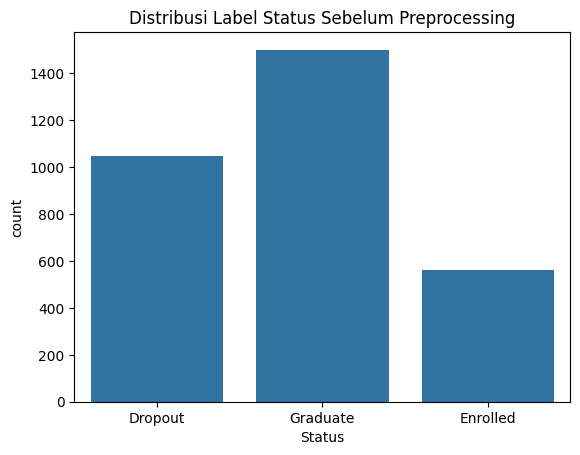

Status
Graduate    0.482482
Dropout     0.337191
Enrolled    0.180328
Name: proportion, dtype: float64


In [1262]:
sns.countplot(x=y)
plt.title('Distribusi Label Status Sebelum Preprocessing')
plt.show()


# distribusi label aseli
print(y.value_counts(normalize=True))


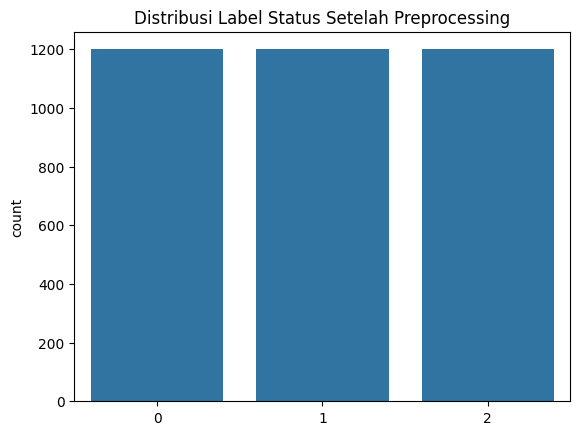

1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64


In [1263]:
sns.countplot(x=y_train_resampled)
plt.title('Distribusi Label Status Setelah Preprocessing')
plt.show()

# Konversi ke Series
y_train_resampled_series = pd.Series(y_train_resampled)

# Lalu baru bisa pakai value_counts
print(y_train_resampled_series.value_counts(normalize=True))


In [1264]:
joblib.dump(preprocessor, "model/preprocessor.pkl")

['model/preprocessor.pkl']

## Modeling

### 4. Modeling

Tiga model klasifikasi digunakan untuk membandingkan performa:

- ✅ **Random Forest** — model berbasis pohon dengan akurasi tinggi dan interpretasi bagus.
- ⚡ **XGBoost** — model boosting yang powerful dan cocok untuk data tabular kompleks.
- 🔁 **Logistic Regression** — model baseline yang cepat dan mudah diinterpretasikan.

Seluruh model dilatih dengan data hasil preprocessing (termasuk SMOTE), dan disimpan prediksinya untuk evaluasi.


In [1265]:
def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        class_weight='balanced'
    )
    rf_model.fit(X_train, y_train)
    return rf_model

def train_logistic_regression(X_train, y_train):
    log_model = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced'
    )
    log_model.fit(X_train, y_train)
    return log_model

def train_xgboost(X_train, y_train):
    xgb_model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    return xgb_model


In [1266]:
# Train models
rf_model = train_random_forest(X_train_resampled, y_train_resampled)
log_model = train_logistic_regression(X_train_resampled, y_train_resampled)
xgb_model = train_xgboost(X_train_resampled, y_train_resampled)


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:37:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Evaluation

### 5. Evaluation

Evaluasi model dilakukan dengan metrik:

- 📊 **Confusion Matrix** — visualisasi prediksi vs data aktual
- 📋 **Classification Report** — precision, recall, f1-score per kelas
- ✅ Fokus pada metrik **macro F1-score** karena data tidak sepenuhnya seimbang

Masing-masing model dibandingkan untuk memilih model terbaik berdasarkan performa terhadap data testing.


In [1267]:
def evaluate_model(model, X_test, y_test, model_name, feature_names=None, label_names=None):
    y_pred = model.predict(X_test)

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_names))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.title(f"Confusion Matrix – {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    if hasattr(model, "feature_importances_") and feature_names is not None:
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
        plt.title(f"Top 10 Feature Importances – {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()


In [1268]:
# Mengambil nama class aseli dari LabelEncoder
label_names = le_status.classes_
label_names

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

***Evaluation Model Random Forest***

Random Forest Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.78      0.79       210
    Enrolled       0.54      0.47      0.50       112
    Graduate       0.82      0.88      0.85       301

    accuracy                           0.77       623
   macro avg       0.72      0.71      0.72       623
weighted avg       0.77      0.77      0.77       623



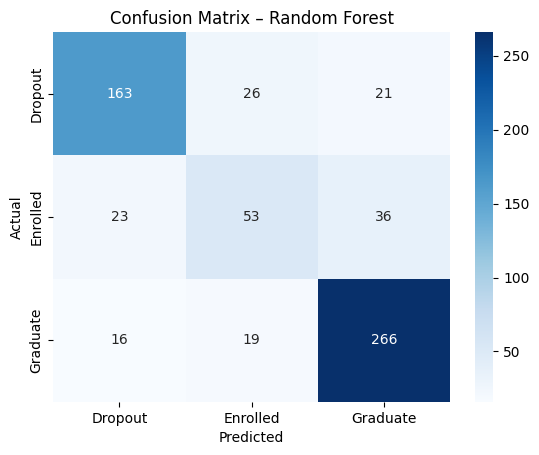

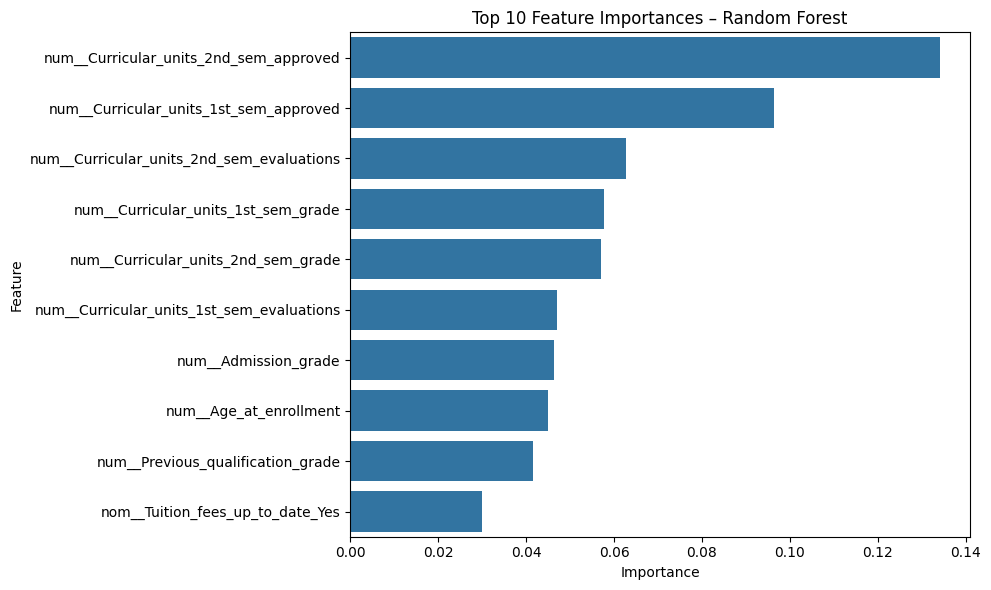

In [1269]:
feature_names = preprocessor.get_feature_names_out()
evaluate_model(rf_model, X_test, y_test, "Random Forest", feature_names=feature_names, label_names=label_names)


***Evaluation Model Logistic Regression***

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.73      0.78       210
    Enrolled       0.47      0.66      0.55       112
    Graduate       0.87      0.82      0.84       301

    accuracy                           0.76       623
   macro avg       0.73      0.74      0.73       623
weighted avg       0.79      0.76      0.77       623



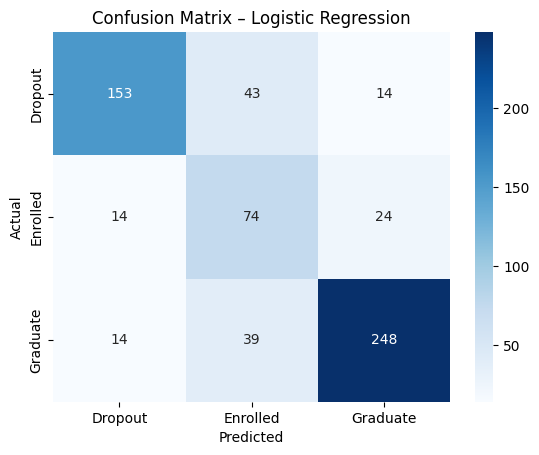

In [1270]:
feature_names = preprocessor.get_feature_names_out()
evaluate_model(log_model, X_test, y_test, "Logistic Regression", feature_names=feature_names, label_names=label_names)

Random Forest Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.78      0.79       210
    Enrolled       0.54      0.47      0.50       112
    Graduate       0.82      0.88      0.85       301

    accuracy                           0.77       623
   macro avg       0.72      0.71      0.72       623
weighted avg       0.77      0.77      0.77       623



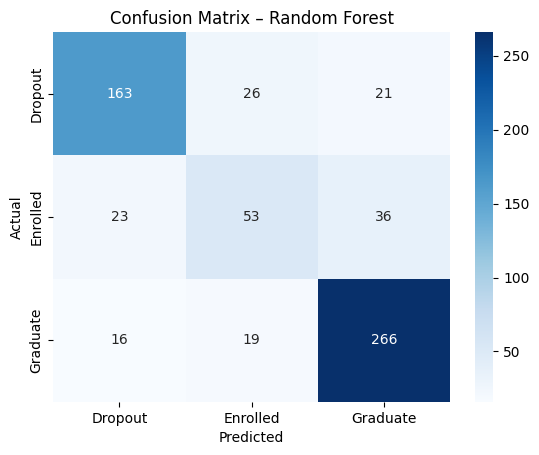

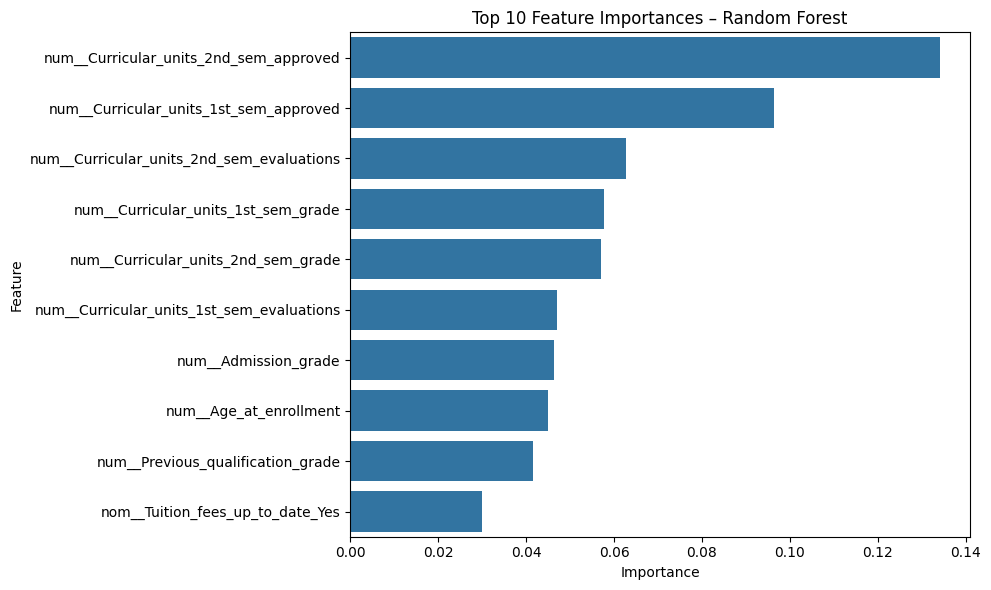

In [1271]:
evaluate_model(rf_model, X_test, y_test, "Random Forest", feature_names=feature_names, label_names=label_names)

***Evaluation Model XGBoost***

XGBoost Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       210
    Enrolled       0.47      0.41      0.44       112
    Graduate       0.81      0.88      0.84       301

    accuracy                           0.76       623
   macro avg       0.70      0.69      0.69       623
weighted avg       0.75      0.76      0.75       623



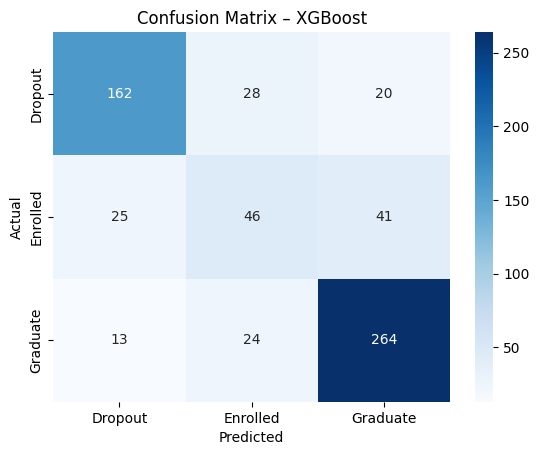

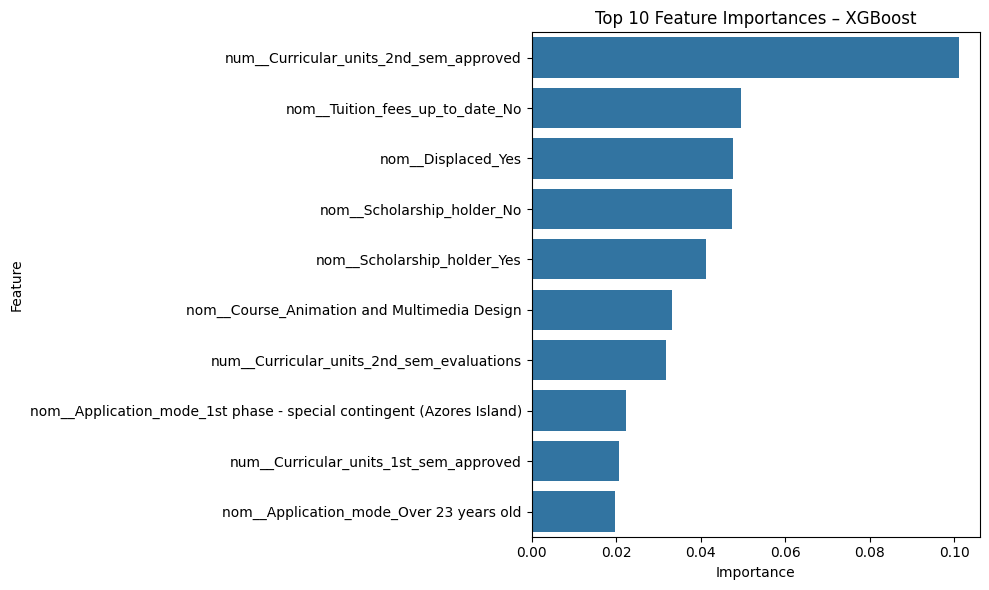

In [1272]:
evaluate_model(xgb_model, X_test, y_test, "XGBoost", feature_names=feature_names, label_names=label_names)

***SIMPAN MODEL TERBAIK***

In [1273]:
#save Random Forest model
joblib.dump(rf_model, "model/rf_model.pkl")

['model/rf_model.pkl']

## 6. Model Selection & Key Insights

### ✅ Best Model: Random Forest Classifier
Setelah membandingkan 3 model (Random Forest, Logistic Regression, dan XGBoost), **Random Forest** memberikan hasil terbaik dalam hal akurasi dan interpretabilitas fitur.

---

### 🔍 Feature Importance Insights

1. **📚 Curricular Units (Semester 1 dan 2) Sangat Mempengaruhi**:
   - `credited`, `enrolled`, `evaluations`, dan `approved` pada semester 1 memiliki kontribusi besar dalam menentukan risiko dropout.
   - Mahasiswa dengan sedikit unit yang diambil, dinilai, atau disetujui pada semester awal lebih rentan dropout.

2. **🎯 Nilai Penerimaan & Umur Saat Diterima**:
   - Nilai akademik saat masuk dan usia saat diterima sangat berkorelasi dengan kelulusan.
   - Usia yang lebih tinggi saat penerimaan cenderung berisiko lebih tinggi terhadap dropout.

3. **💸 Tuition Fees & Beasiswa**:
   - Ketidaksesuaian biaya kuliah dengan kondisi mahasiswa dapat memicu dropout.
   - Penerima beasiswa memiliki kecenderungan lebih rendah untuk dropout.

---

### 📈 EDA-Driven Insights

- 🔻 **Low Curricular Unit Distribution → Dropout Risk**  
  Mahasiswa dengan performa rendah pada distribusi mata kuliah semester 1 & 2 lebih sering mengalami dropout.

- 👵 **Older Age at Admission → Dropout Risk**  
  Umur yang lebih tua saat penerimaan sering kali diikuti dengan tingkat dropout yang lebih tinggi.

---

### 🧠 Kesimpulan

Faktor-faktor akademik awal (nilai & unit semester 1), usia saat masuk, dukungan keuangan (tuition & beasiswa) adalah indikator kuat dalam memprediksi risiko mahasiswa dropout. Intervensi dini terhadap aspek-aspek ini bisa sangat membantu dalam meningkatkan retensi mahasiswa.
